In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv("C:/Users/Sahil/OneDrive/Desktop/Capstone Project/CapProject/NOTEBOOK/SuicideChina.csv")
df

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
...,...,...,...,...,...,...,...,...,...,...,...,...
2566,2567,2567,yes,no,unknown,2010,7,male,28,primary,household,Pesticide
2567,2568,2568,yes,no,unknown,2011,6,male,35,Secondary,farming,Pesticide
2568,2569,2569,yes,no,unknown,2011,9,female,22,Secondary,unemployed,Other poison
2569,2570,2570,yes,no,unknown,2010,8,female,50,Secondary,farming,Pesticide


In [3]:
df.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [4]:
df.tail()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
2566,2567,2567,yes,no,unknown,2010,7,male,28,primary,household,Pesticide
2567,2568,2568,yes,no,unknown,2011,6,male,35,Secondary,farming,Pesticide
2568,2569,2569,yes,no,unknown,2011,9,female,22,Secondary,unemployed,Other poison
2569,2570,2570,yes,no,unknown,2010,8,female,50,Secondary,farming,Pesticide
2570,2571,2571,yes,no,unknown,2010,7,female,44,primary,farming,Pesticide


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [6]:
df.describe()

,Unnamed: 0,Person_ID,Year,Month,Age
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,1286.000000,1286.000000,2010.045508,6.298327,52.630883
std,742.328095,742.328095,0.791412,3.202515,19.783878
min,1.000000,1.000000,2009.000000,1.000000,12.000000
25%,643.500000,643.500000,2009.000000,4.000000,37.000000
50%,1286.000000,1286.000000,2010.000000,6.000000,53.000000
75%,1928.500000,1928.500000,2011.000000,9.000000,69.000000
max,2571.000000,2571.000000,2011.000000,12.000000,100.000000


In [7]:
df.shape

(2571, 12)

In [8]:
df.columns


Index(['Unnamed: 0', 'Person_ID', 'Hospitalised', 'Died', 'Urban', 'Year',
       'Month', 'Sex', 'Age', 'Education', 'Occupation', 'method'],
      dtype='object')

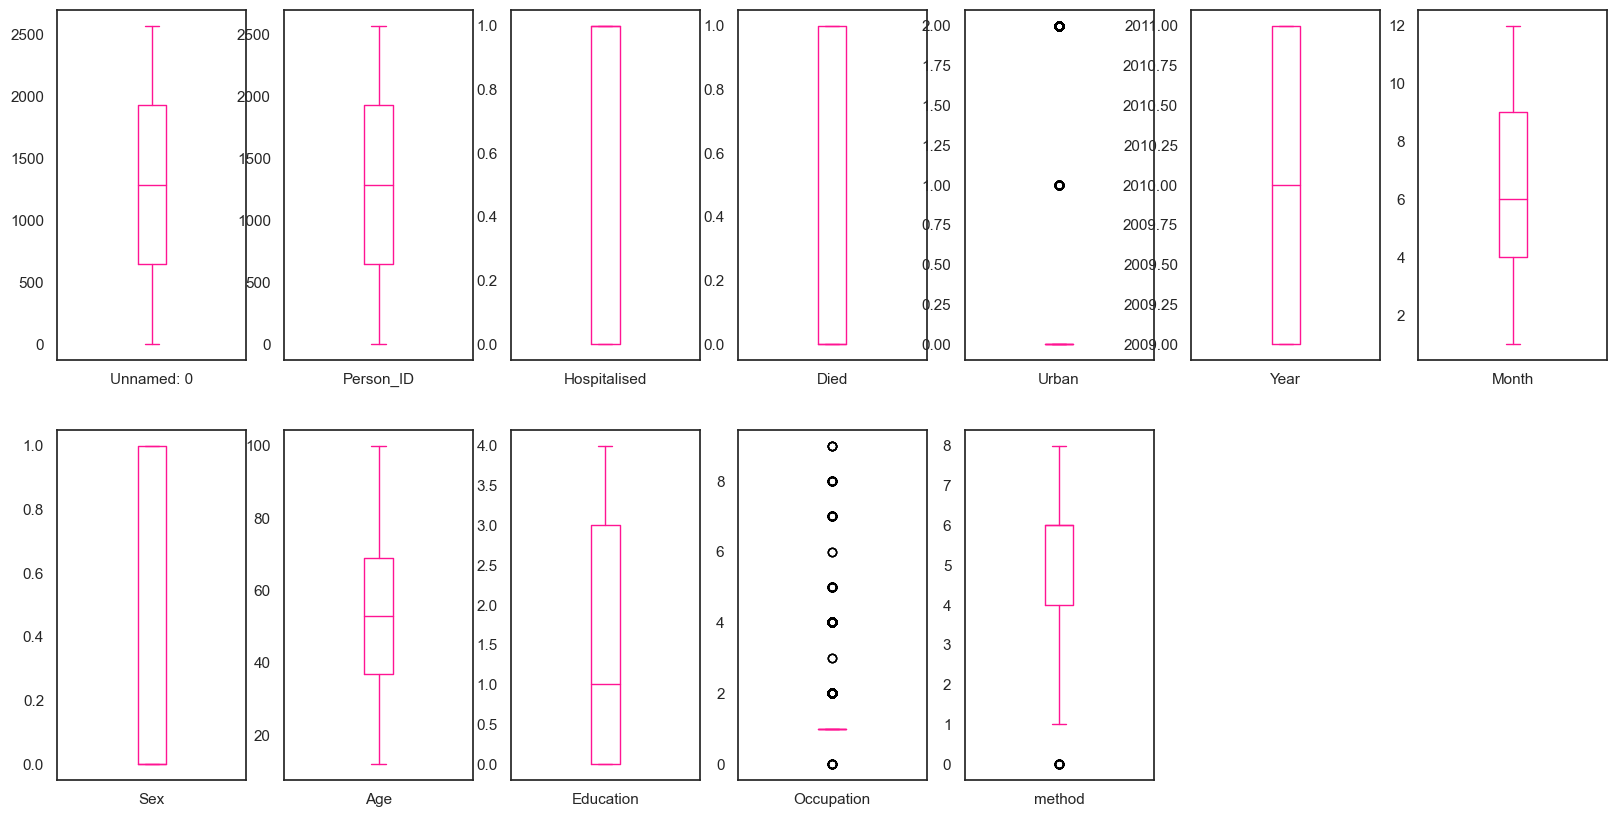

In [35]:
#Dectecting Outliners
df.plot(kind='box', subplots=True, 
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');


In [34]:
#identify the outliers
# define continuous variable & plot
continous_features = ['Age','Year','Month','Person_ID','Education']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])


For the feature Age, No of Outliers is 0
For the feature Year, No of Outliers is 0
For the feature Month, No of Outliers is 0
For the feature Person_ID, No of Outliers is 0
For the feature Education, No of Outliers is 0


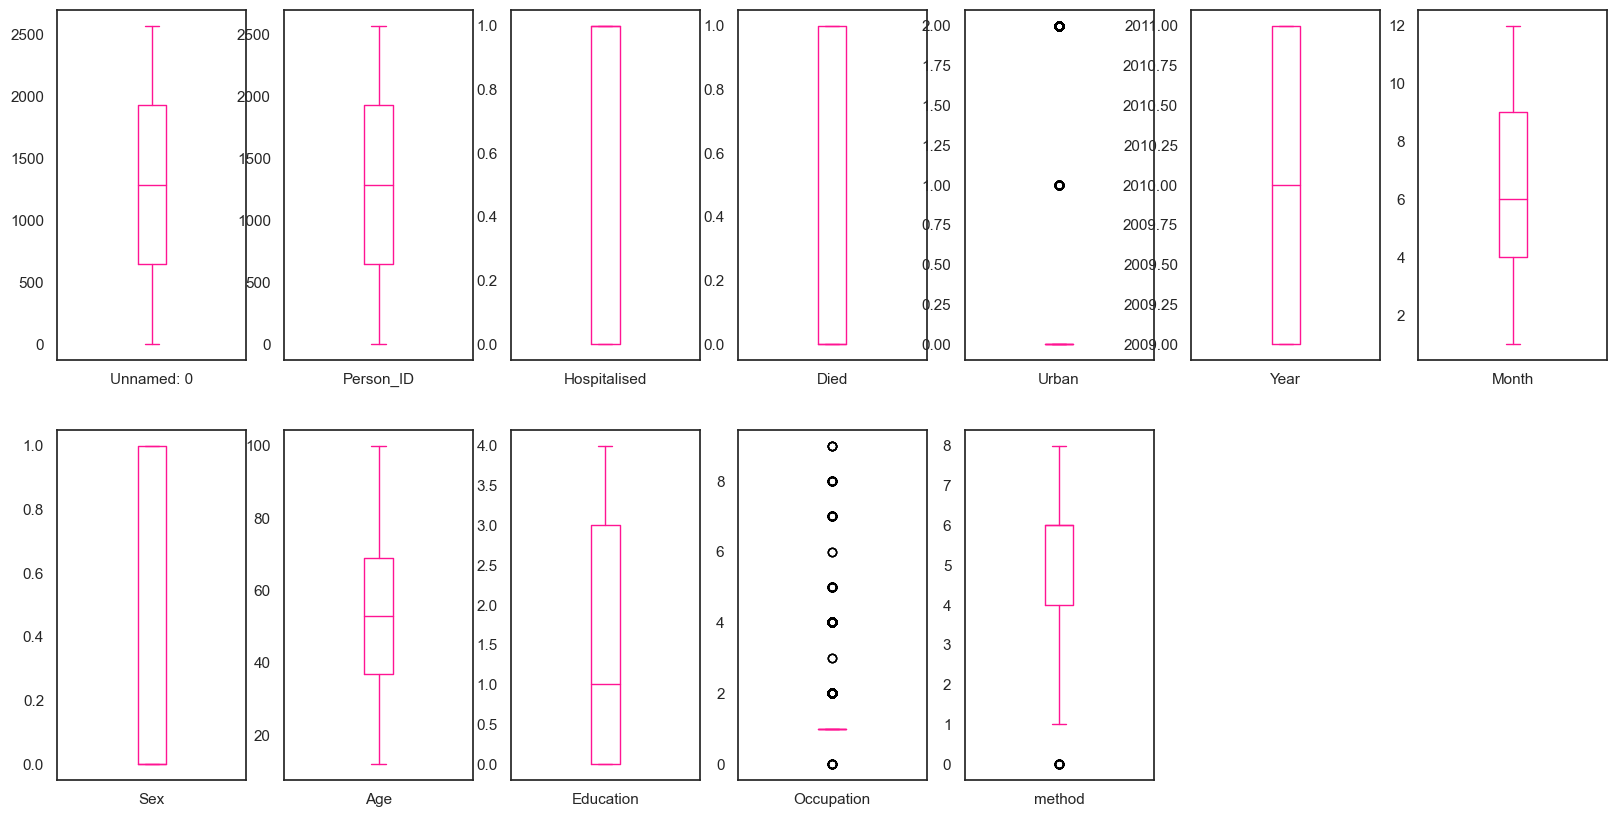

In [36]:
#check if outliers got removed
df.plot(kind='box', subplots=True, 
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');


In [12]:
df.shape

(2571, 12)

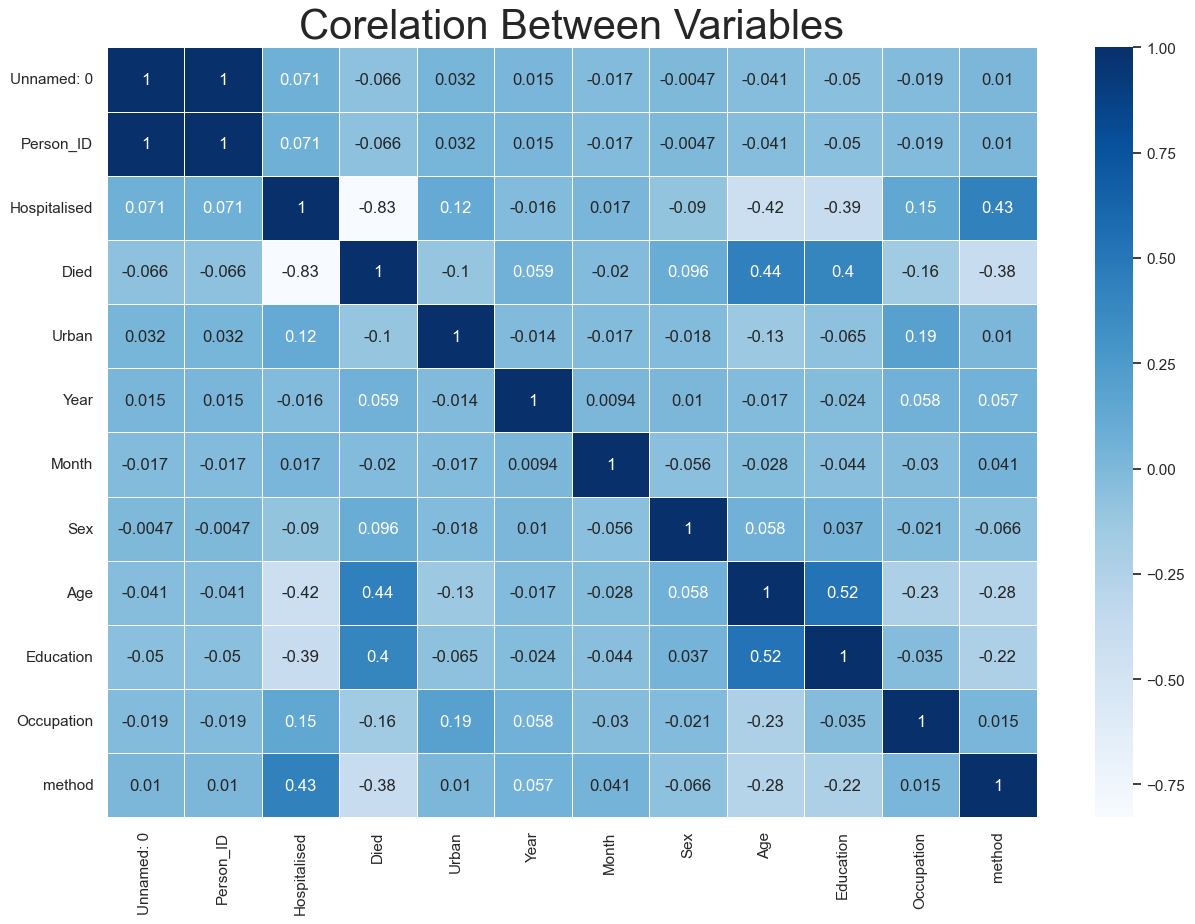

In [37]:
#check correlation between variables
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()


In [14]:
df['Died'] = df['Died'].map({'no': 0, 'yes': 1})

Text(0.5, 1.0, 'Distribution of Ages in Suicide Dataset')

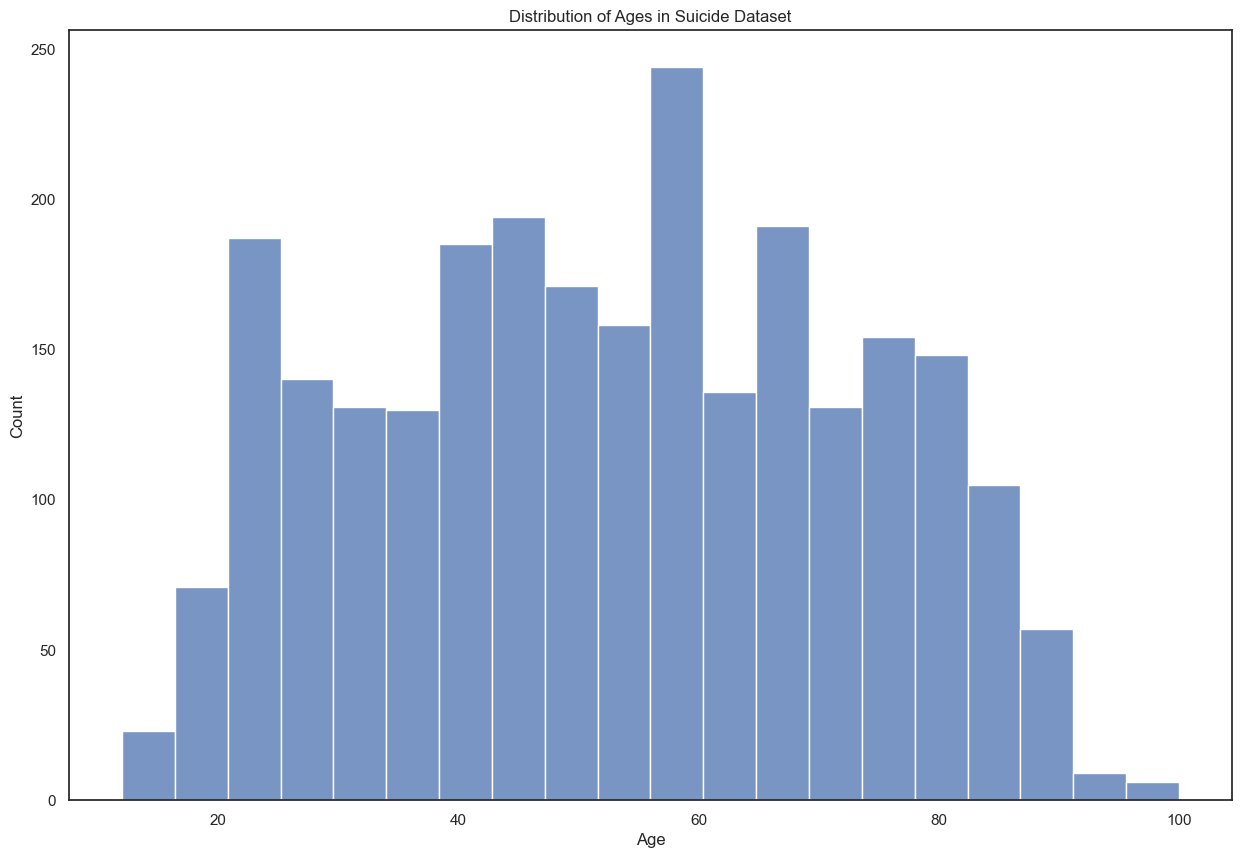

In [15]:
sns.histplot(df['Age'], kde=False, bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages in Suicide Dataset')

Text(0.5, 1.0, 'Suicide Rates by Gender')

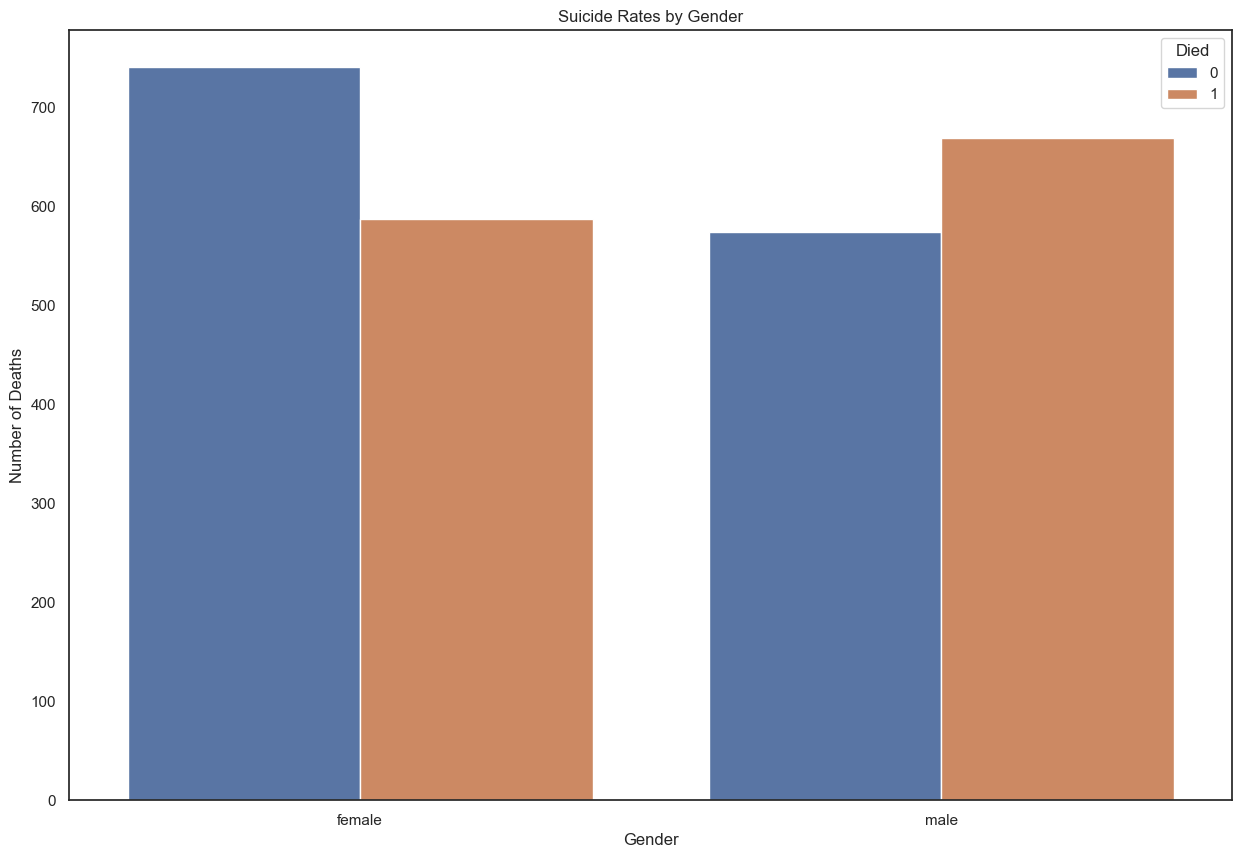

In [16]:
sns.countplot(x='Sex', data=df,hue= 'Died')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.title('Suicide Rates by Gender')

Text(0.5, 1.0, 'Age versus Education Level')

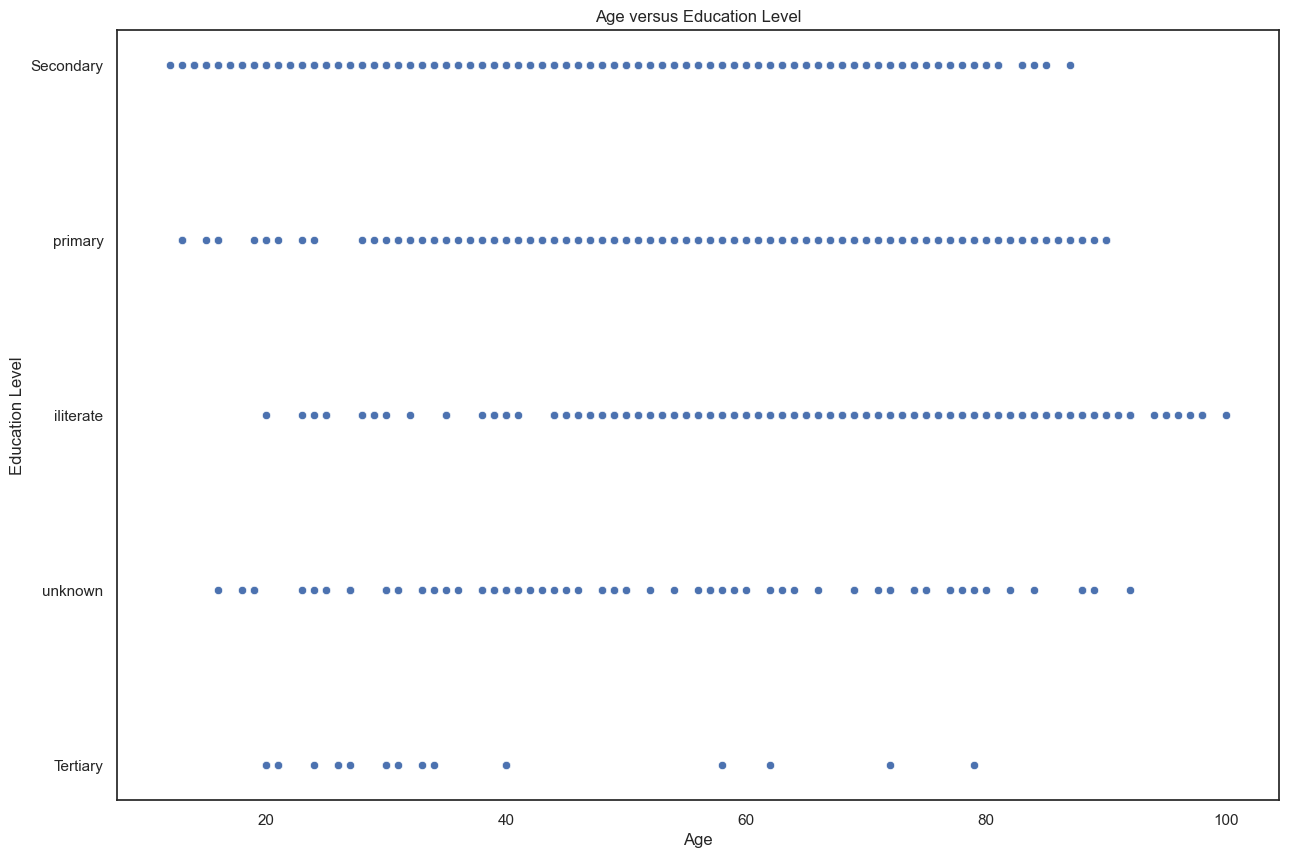

In [17]:
# Create a scatterplot of age versus education level
sns.scatterplot(x='Age', y='Education', data=df)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('Age versus Education Level')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'household'),
  Text(1, 0, 'farming'),
  Text(2, 0, 'others/unknown'),
  Text(3, 0, 'professional'),
  Text(4, 0, 'unemployed'),
  Text(5, 0, 'business/service'),
  Text(6, 0, 'student'),
  Text(7, 0, 'worker'),
  Text(8, 0, 'others'),
  Text(9, 0, 'retiree')])

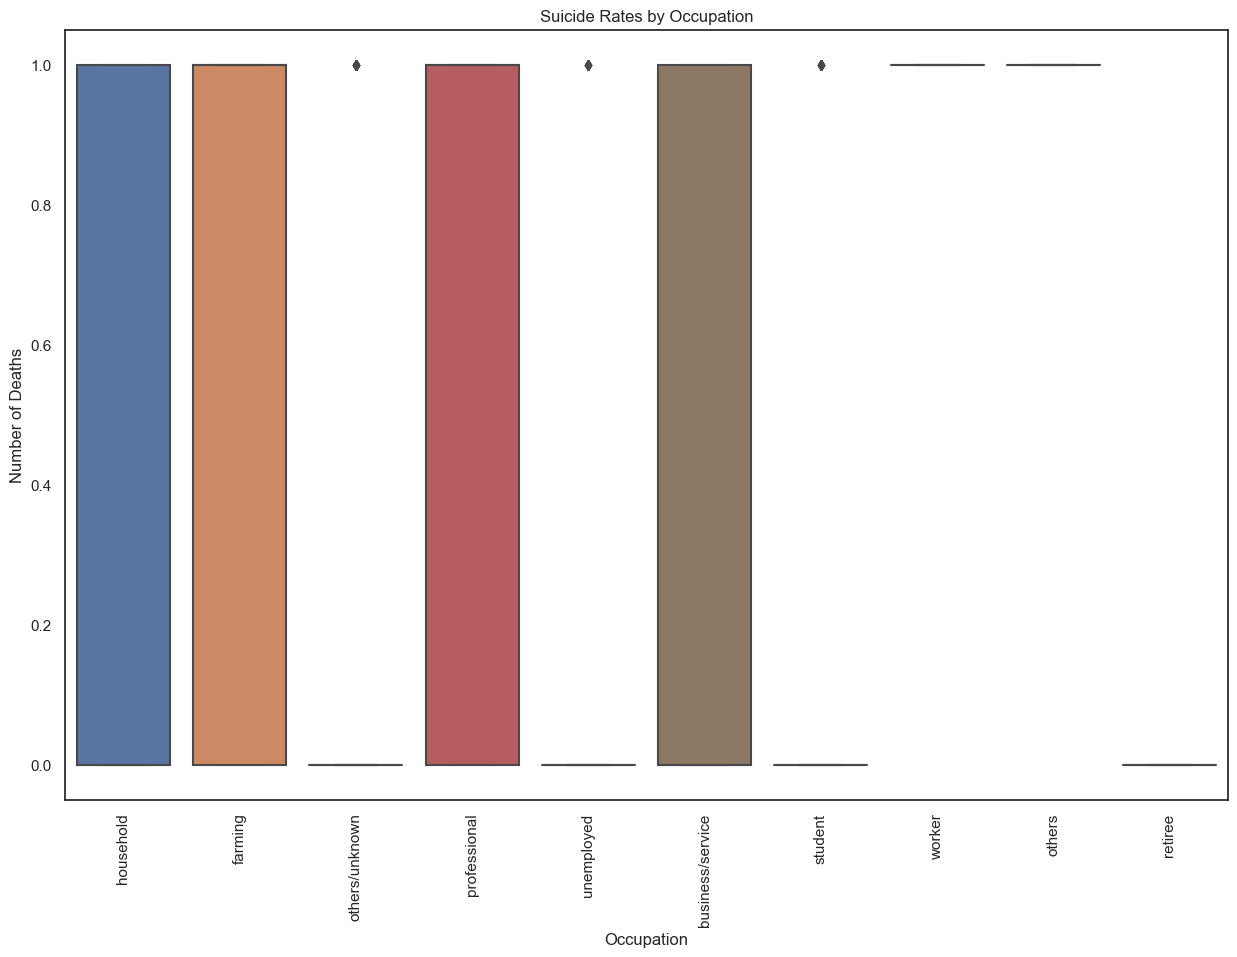

In [18]:
sns.boxplot(x='Occupation', y='Died', data=df)
plt.xlabel('Occupation')
plt.ylabel('Number of Deaths')
plt.title('Suicide Rates by Occupation')
plt.xticks(rotation=90)

(array([2008.75, 2009.  , 2009.25, 2009.5 , 2009.75, 2010.  , 2010.25,
        2010.5 , 2010.75, 2011.  , 2011.25]),
 [Text(2008.75, 0, '2008.75'),
  Text(2009.0, 0, '2009.00'),
  Text(2009.25, 0, '2009.25'),
  Text(2009.5, 0, '2009.50'),
  Text(2009.75, 0, '2009.75'),
  Text(2010.0, 0, '2010.00'),
  Text(2010.25, 0, '2010.25'),
  Text(2010.5, 0, '2010.50'),
  Text(2010.75, 0, '2010.75'),
  Text(2011.0, 0, '2011.00'),
  Text(2011.25, 0, '2011.25')])

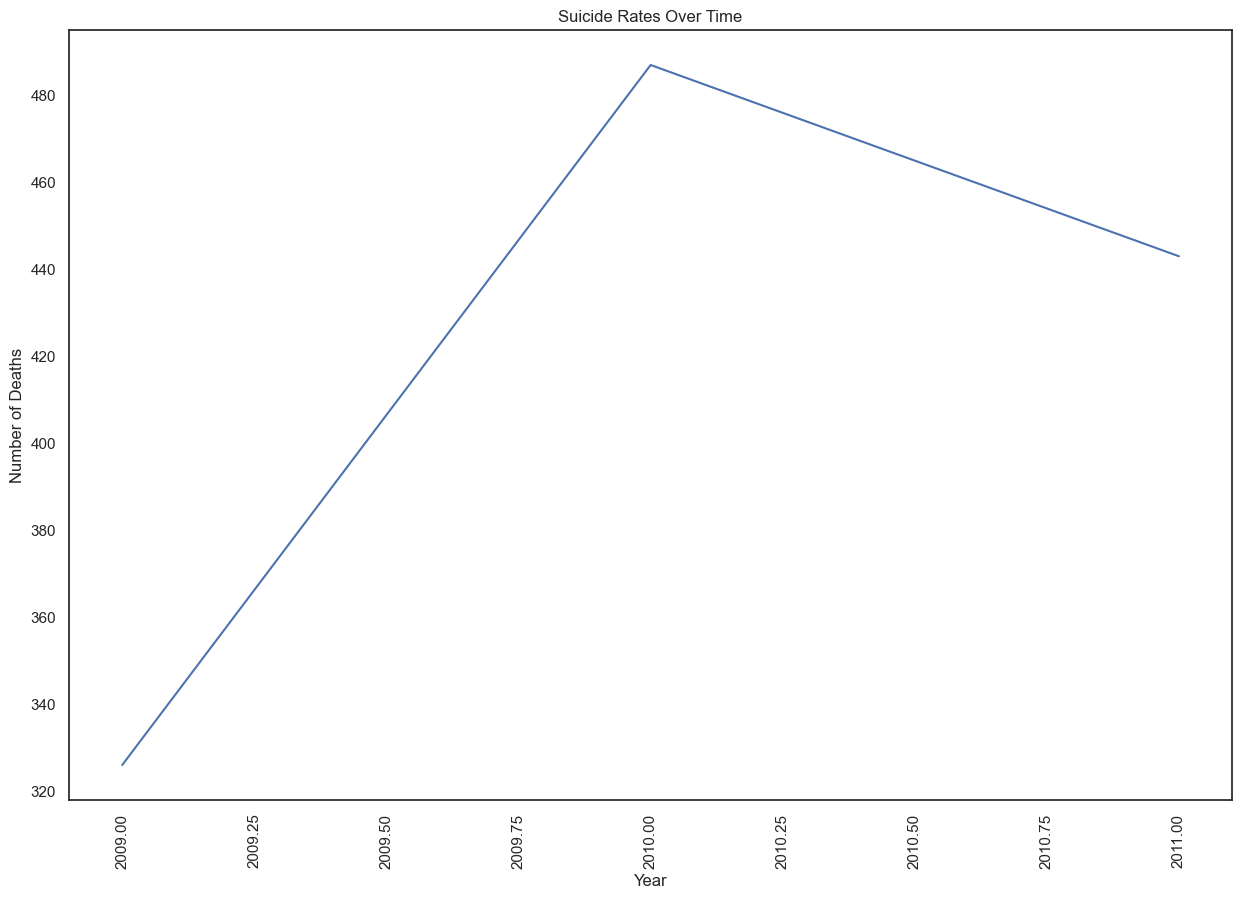

In [19]:
suicide_rates = df.groupby('Year')['Died'].sum().reset_index()
sns.lineplot(x='Year', y='Died', data=suicide_rates)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Suicide Rates Over Time')
plt.xticks(rotation=90)

In [20]:
# Check for missing values
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64


In [21]:
# Check for class imbalance
counts = df['Died'].value_counts()
print("Class counts:")
print(counts)
print("Class imbalance ratio:", counts[0] / counts[1])

Class counts:
0    1315
1    1256
Name: Died, dtype: int64
Class imbalance ratio: 1.0469745222929936


In [22]:
# Check for feature scaling
print("Feature scales:")
print(df.drop(['Person_ID', 'Year', 'Month', 'Died'], axis=1).describe())

Feature scales:
        Unnamed: 0          Age
count  2571.000000  2571.000000
mean   1286.000000    52.630883
std     742.328095    19.783878
min       1.000000    12.000000
25%     643.500000    37.000000
50%    1286.000000    53.000000
75%    1928.500000    69.000000
max    2571.000000   100.000000


In [23]:
# Select only the numerical columns
numeric_cols = df.select_dtypes(include=[np.number])

# Identify outliers using the interquartile range (IQR) method
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))


In [40]:
# Handle outliers
# Replace outliers with the nearest reasonable value
df[numeric_cols.columns][outliers] = np.nan
df.fillna(method='ffill', inplace=True)

For the feature Unnamed: 0, No of Outliers is 0
For the feature Person_ID, No of Outliers is 0
For the feature Died, No of Outliers is 0
For the feature Year, No of Outliers is 0
For the feature Month, No of Outliers is 0
For the feature Age, No of Outliers is 0


C:\Users\Sahil\AppData\Local\Temp\ipykernel_22000\2306796991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols.columns][outliers] = np.nan


In [25]:
# Convert categorical variables to numeric values using label encoding
encoder = LabelEncoder()
df['Hospitalised'] = encoder.fit_transform(df['Hospitalised'])
df['Urban'] = encoder.fit_transform(df['Urban'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Education'] = encoder.fit_transform(df['Education'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['method'] = encoder.fit_transform(df['method'])

In [26]:
# Handle class imbalance
X = df.drop(['Person_ID', 'Year', 'Month', 'Died'], axis=1)
y = df['Died']
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X, y)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)


In [27]:
# Handle feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [28]:
# Handle feature correlation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=42)


In [30]:
# Train a classification model (e.g., logistic regression)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Evaluate the performance of the model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Accuracy: 0.8073510773130546
Precision: 0.8188976377952756
Recall: 0.789873417721519
F1 score: 0.8041237113402061


In [33]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="SucideChina",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]